In [205]:
from bs4 import BeautifulSoup
import requests
import re
import seaborn
import matplotlib.pyplot as plt
plt.style.use('ggplot')
seaborn.set_context('talk')

In [7]:
r  = requests.get('https://www.airliners.net/aircraft-data')

data = r.text

soup = BeautifulSoup(data)

In [8]:
soup

<!DOCTYPE html>
<html xmlns="http://www.w3.org/1999/xhtml" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://opengraphprotocol.org/schema/">
<head>
<title>Airliners.net</title>
<meta content="index, follow" name="robots"/>
<meta content="width=device-width, height=device-height, initial-scale=1.0, user-scalable=0, minimum-scale=1.0, maximum-scale=1.0" name="viewport"/>
<meta content="website" property="og:type"/>
<meta content="Airliners.net" property="og:site_name"/>
<meta content="181703240425" property="fb:app_id"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta charset="utf-8"/>
<link href="/build/images/logo/favicon-194x194.png?v=v4" rel="icon" type="image/x-icon"/>
<script>
  (function(i,s,o,g,r,a,m){i['GoogleAnalyticsObject']=r;i[r]=i[r]||function(){
  (i[r].q=i[r].q||[]).push(arguments)},i[r].l=1*new Date();a=s.createElement(o),
  m=s.getElementsByTagName(o)[0];a.async=1;a.src=g;m.parentNode.insertBefore(a,m)
  })(window,document,'script'

In [28]:
a=soup.find_all('a')

In [47]:
def isit(x):
    if 'href' in x.attrs and '/aircraft-data/' in x.attrs['href']:
        return True
    else:
        return False
to_scrape=['https://www.airliners.net/aircraft-data'+i.attrs['href'] for i in a if isit(i)]

In [119]:
import tqdm

In [167]:
airplanes={}
for i in tqdm.tqdm_notebook(to_scrape):
    r  = requests.get(i)

    data = r.text

    soup = BeautifulSoup(data)
    history=soup.findAll('div',text='History')[0].parent.findAll('div')[1].get_text()
    a=re.findall(pattern='([0-9]+)',string=history)
    a=[int(i) for i in a]
    try:
        created=min([i for i in a if i>1900])
    except:
        print(f'No created date for {name}')
        created=-1
    name=soup.findAll('h1')[0].get_text()
    
    performance=soup.findAll('div',text='Performance')[0].parent.findAll('div')[1].get_text()
    
    a=re.findall('cruising speed[A-z ]+([0-9]+)km/h',performance,flags=re.I)
    try:
        maxspeed=min([int(i) for i in a])
    except:
        print(f'No cruise speed for {name}')
        maxspeed=-1
    
    
    airplanes[name]={}
    airplanes[name]['created']=created
    airplanes[name]['cruise_speed']=maxspeed

No cruise speed for Aerospatiale-British Aerospace Concorde
No cruise speed for Airbus A318
No cruise speed for Airbus A319
No cruise speed for Airbus A319CJ
No cruise speed for Airbus A340-500/600
No cruise speed for Airbus A380
No cruise speed for Antonov An-22 Antei
No cruise speed for Antonov An-225 Mriya
No cruise speed for Antonov An-72/74
No cruise speed for Aviat A-1 Husky
No cruise speed for Ayres Thrush & Rockwell Thrush Commander
No cruise speed for BAE Systems Avro RJX85/100
No cruise speed for Beriev Be-30/32
No cruise speed for Boeing 737-600/700
No cruise speed for Boeing 737-700/800 BBJ/BBJ2
No cruise speed for Boeing 737-800/900
No cruise speed for Boeing 747SP
No cruise speed for Boeing 757-300
No cruise speed for Boeing 767-400
No cruise speed for Boeing B-17 Flying Fortress
No cruise speed for Britten-Norman BN-2A Mk.3 Trislander
No cruise speed for CAP Aviation CAP-10/20/21/230/231/232
No cruise speed for Cessna 560XL Citation Excel
No cruise speed for Cessna Citat

In [199]:
import pickle
with open('airplanes.pkl','wb') as file:
    pickle.dump(airplanes,file)

In [201]:
import pickle
with open('airplanes.pkl','rb') as file:
    airplanes=pickle.load(file)

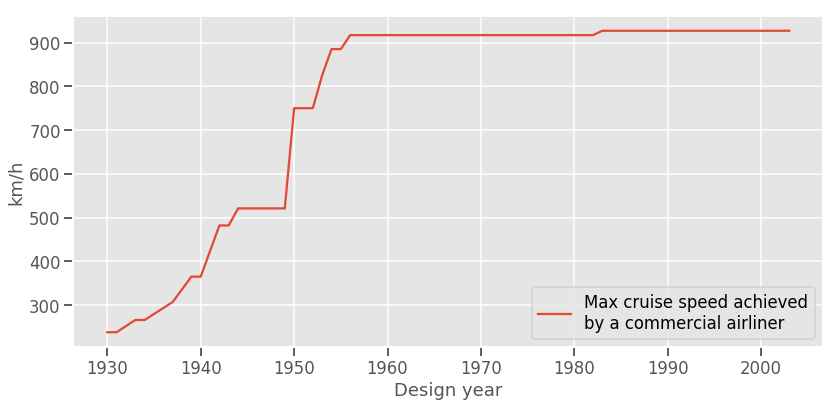

In [212]:
import pandas as pd

d=(
    pd.DataFrame(airplanes)
    .T.query("cruise_speed>40 and cruise_speed<933")
    .sort_values("cruise_speed")
    .groupby("created")
    .max()

)
k=[]
max_speed=d.iloc[0,0]
for i in d.cruise_speed:
    if i>max_speed:
        max_speed=i
    k.append(max_speed)
d['cruise_speed']=k
d.plot(figsize=(12,6))
plt.legend(['Max cruise speed achieved\nby a commercial airliner'])
plt.ylabel('km/h')
plt.xlabel('Design year')
plt.tight_layout()
plt.savefig('airplanes.png')

In [227]:
wiki=pd.read_csv('Flight airspeed records over time (1) Grid.csv')
wiki.columns=['Year','cruise_speed']
wiki['Year']=wiki.Year.apply(lambda x: x[:4]).astype(int)
wiki=wiki.groupby('Year').max().reset_index()
wiki=wiki.set_index('Year')
k=[]
max_speed=wiki.iloc[0,0]
for i in wiki.cruise_speed:
    if i>max_speed:
        max_speed=i
    k.append(max_speed)
wiki['cruise_speed']=k

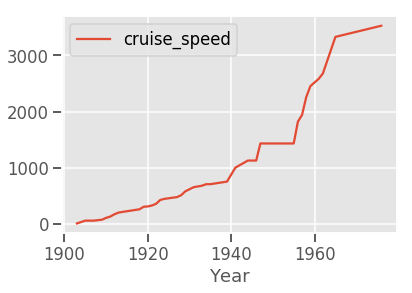

In [228]:
wiki.plot()

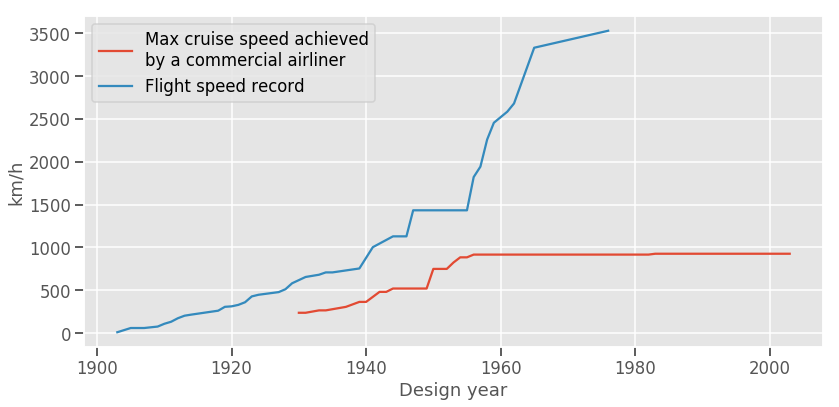

In [232]:
d.plot(figsize=(12,6))
wiki.plot(ax=plt.gca())
plt.legend(['Max cruise speed achieved\nby a commercial airliner','Flight speed record'])
plt.ylabel('km/h')
plt.xlabel('Design year')
plt.tight_layout()
plt.savefig('airplanes_record.png')

In [223]:
wiki=pd.read_csv('Flight airspeed records over time (1) Grid.csv')
wiki.columns=['Year','cruise_speed']
wiki['Year']=wiki.Year.apply(lambda x: x[:4])
wiki.groupby('Year').max().reset_index()

,Year,cruise_speed
0,1903,10.980
1,1905,60.230
2,1906,41.292
3,1907,52.700
4,1909,76.995
5,1910,109.756
6,1911,133.136
7,1912,174.100
8,1913,203.850
9,1914,216.500
